In [1]:
import json
from pathlib import Path

# Load results for a specific problem
problem_id = "problem_6481"  # Your processed problem
results_dir = Path("rollout_results_no_ablation_with_text") / problem_id

# Load the sentence rollouts
with open(results_dir / "sentence_rollouts_last_186.json", 'r') as f:
    sentence_rollouts_no_ablation = json.load(f)

print(f"Loaded no_ablation sentence results")

Loaded no_ablation sentence results


In [2]:
import json
from pathlib import Path

# Load results for a specific problem
problem_id = "problem_6481"  # Your processed problem
results_dir = Path("rollout_results_ablation_with_text") / problem_id

# Load the sentence rollouts
with open(results_dir / "sentence_multi_head_ablation_rollouts.json", 'r') as f:
    sentence_rollouts_ablation = json.load(f)

print(f"Loaded ablation sentence results")

Loaded ablation sentence results


In [3]:
import json
from pathlib import Path

# Load results for a specific problem
problem_id = "problem_6481"  # Your processed problem
results_dir = Path("random_rollout_results_ablation_with_text") / problem_id

# Load the sentence rollouts
with open(results_dir / "sentence_multi_head_ablation_rollouts.json", 'r') as f:
    sentence_rollouts_random_ablation = json.load(f)

print(f"Loaded random ablation sentence results")

Loaded random ablation sentence results


In [4]:
generated_text_no_ablation = sentence_rollouts_no_ablation["rollout_texts"]
generated_text_ablation = sentence_rollouts_ablation[0]["rollout_texts"]
generated_text_random_ablation = sentence_rollouts_random_ablation[0]["rollout_texts"]


In [5]:
length_no_ablation = [len(text) for text in generated_text_no_ablation]
length_ablation = [len(text) for text in generated_text_ablation]
length_random_ablation = [len(text) for text in generated_text_random_ablation]

In [6]:
length_no_ablation

[3504, 8334, 11336, 10946, 11414, 8214, 8098, 10550, 7124, 5738, 9571, 7471]

In [7]:
length_ablation

[8011, 9769, 5872, 10986, 6953, 10073, 7318, 7442, 5810, 14311, 6662, 8959]

In [8]:
length_random_ablation

[8492, 4169, 7359, 12861, 12774, 6492, 7249, 11101, 8244, 7056, 6572, 6917]

In [9]:
import numpy as np

print("Mean character length (no ablation):", np.mean(length_no_ablation))
print("Mean character length (ablation):", np.mean(length_ablation))
print("Mean character length (random ablation):", np.mean(length_random_ablation))

Mean character length (no ablation): 8525.0
Mean character length (ablation): 8513.833333333334
Mean character length (random ablation): 8273.833333333334


/tmp/ipykernel_1162804/787702162.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


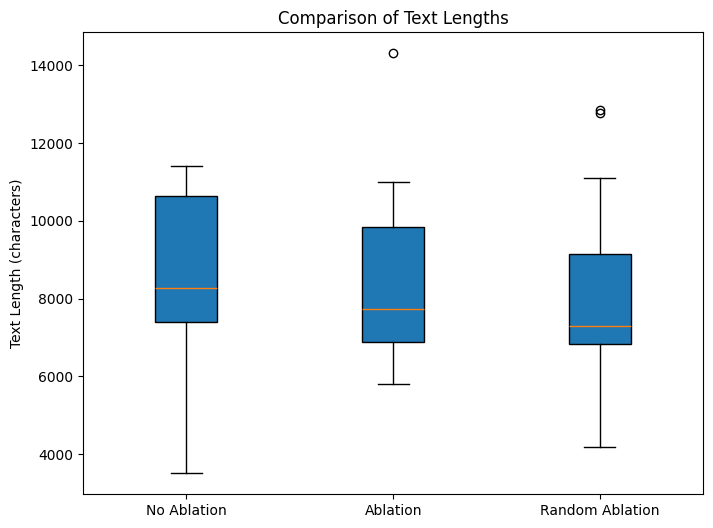

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(
    [length_no_ablation, length_ablation, length_random_ablation],
    labels=['No Ablation', 'Ablation', 'Random Ablation'],
    patch_artist=True
)
plt.ylabel('Text Length (characters)')
plt.title('Comparison of Text Lengths')
plt.show()

In [11]:
random_heads = [(1, 19),
 (1, 22),
 (1, 29),
 (2, 1),
 (5, 18),
 (5, 31),
 (6, 17),
 (7, 4),
 (8, 29),
 (12, 23),
 (13, 31),
 (14, 3),
 (14, 9),
 (14, 28),
 (15, 21),
 (17, 19),
 (17, 25),
 (26, 27),
 (27, 0),
 (28, 23)]

In [12]:
reciever_heads = [(29, 24),
 (17, 0),
 (24, 7),
 (25, 22),
 (23, 8),
 (18, 12),
 (23, 23),
 (21, 4),
 (19, 17),
 (18, 14),
 (30, 17),
 (19, 27),
 (28, 22),
 (1, 17),
 (27, 1),
 (24, 1),
 (26, 10),
 (26, 24),
 (1, 16),
 (24, 5)]

In [13]:
import os

import json

def process_problem_data(base_path):

    """

    Iterates through all problem directories, extracts problem statements

    and sentences from `chunks_labeled.json`, and returns a list of dictionaries.


    Args:

        base_path (str): The path to the directory containing all the problems

                         (e.g., 'math-rollouts/.../correct_base_solution').


    Returns:

        list: A list of dictionaries, where each dictionary contains the problem

              and all sentences for a given problem directory.

    """

    all_problem_data = []


    # Check if the base path exists

    if not os.path.isdir(base_path):

        print(f"Error: The directory '{base_path}' was not found.")

        return all_problem_data

    print(f"Found problem directory: {base_path}")


    # List all entries in the base directory

    problem_dirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

    print(f"Found problem directory: {problem_dirs}")


    if not problem_dirs:

        print(f"No problem directories found in '{base_path}'.")

        return all_problem_data


    # Iterate through each problem directory (e.g., problem_330, problem_1591)

    for problem_name in problem_dirs:

        problem_path = os.path.join(base_path, problem_name)

       

        # Define the file paths for the problem and chunks

        problem_file = os.path.join(problem_path, "problem.json")

        chunks_file = os.path.join(problem_path, "chunks_labeled.json")

       

        problem_text = ""

        allsentences = []

       

        # Load the problem statement

        try:

            with open(problem_file, 'r') as f:

                problem_data = json.load(f)

                problem_text = problem_data.get("problem", "")
                problem_answer = problem_data.get("gt_answer", "")
                

        except (FileNotFoundError, json.JSONDecodeError) as e:

            print(f"Skipping {problem_name}: Could not load problem.json. Error: {e}")

            continue


        # Load all sentences from chunks_labeled.json

        try:

            with open(chunks_file, 'r') as f:

                chunks_data = json.load(f)

                allsentences = [chunk["chunk"] for chunk in chunks_data]

        except (FileNotFoundError, json.JSONDecodeError) as e:

            print(f"Skipping {problem_name}: Could not load chunks_labeled.json. Error: {e}")

            continue


        # Create a dictionary to store the extracted data

        problem_info = {

            "problem_id": problem_name,

            "problem_statement": problem_text,

            "sentences": allsentences,
            "answer": problem_answer

        }

        all_problem_data.append(problem_info)


    return all_problem_data

    print("No data was loaded.")




# Define the base directory for all problems

base_problem_dir = "../math-rollouts/deepseek-r1-distill-llama-8b/temperature_0.6_top_p_0.95/correct_base_solution"

# Run the function to get all the data

correct_all_prompt = process_problem_data(base_problem_dir)


# Now, `all_data` is a list of dictionaries. You can iterate through it.

print(f"Successfully loaded data for {len(correct_all_prompt)} problems.")

# Define the base directory for all problems

base_problem_dir = "../math-rollouts/deepseek-r1-distill-llama-8b/temperature_0.6_top_p_0.95/incorrect_base_solution"

# Run the function to get all the data

incorrect_all_prompt = process_problem_data(base_problem_dir)


print(f"Successfully loaded data for {len(incorrect_all_prompt)} problems.")

Found problem directory: ../math-rollouts/deepseek-r1-distill-llama-8b/temperature_0.6_top_p_0.95/correct_base_solution
Found problem directory: ['problem_6481', 'problem_4682', 'problem_3360', 'problem_4605', 'problem_2236', 'problem_1591', 'problem_4164', 'problem_2189', 'problem_2238', 'problem_3935', 'problem_6596', 'problem_3550', 'problem_2870', 'problem_4019', 'problem_2050', 'problem_6998', 'problem_3916', 'problem_2137', 'problem_3448', 'problem_330']
Successfully loaded data for 20 problems.
Found problem directory: ../math-rollouts/deepseek-r1-distill-llama-8b/temperature_0.6_top_p_0.95/incorrect_base_solution
Found problem directory: ['problem_4019', 'problem_2870', 'problem_3550', 'problem_3935', 'problem_6596', 'problem_2238', 'problem_2189', 'problem_4164', 'problem_1591', 'problem_2236', 'problem_4605', 'problem_3360', 'problem_6481', 'problem_4682', 'problem_3448', 'problem_2137', 'problem_330', 'problem_6998', 'problem_3916', 'problem_2050']
Successfully loaded data f

In [14]:
all_prompt = correct_all_prompt[:2] + incorrect_all_prompt[:2]

In [15]:
#text before rollouts
problem_text =all_prompt[0]["problem_statement"]
allsentences = all_prompt[0]["sentences"]
prefix_text = allsentences[:186]
context_without = problem_text + " " + " ".join(prefix_text) + ""

In [16]:
def get_average_attention_all_heads(model, tokenizer, texts, max_length=8000):
    """
    Compute average attention for all heads over a list of texts.
    Returns:
        average_attention: tensor (num_layers, num_heads, seq_len, seq_len)
    """
    attn_accum = None
    count = 0
    for text in texts:
        # full_cot = context_without + " " + text
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=max_length)
        inputs = {k: v.to(model.device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs, output_attentions=True)
        # outputs.attentions: tuple of (num_layers,) each (1, num_heads, seq_len, seq_len)
        attn = torch.stack([a[0].cpu().to(torch.float32) for a in outputs.attentions])  # (num_layers, num_heads, seq_len, seq_len)
        if attn_accum is None:
            attn_accum = attn
        else:
            attn_accum += attn
        count += 1
        del outputs, attn
        torch.cuda.empty_cache()
    average_attention = attn_accum / 1
    return average_attention

In [17]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BitsAndBytesConfig, AutoModelForCausalLM, pipeline

import torch


model_name = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B" # Or any other suitable model

mname = model_name

tokenizer = AutoTokenizer.from_pretrained(model_name)

# Important: Add a pad token if the tokenizer doesn't have one, especially for decoder models.

if tokenizer.pad_token is None:

    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

In [ ]:
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True, torch_dtype=torch.bfloat16, device_map="auto")

In [ ]:
generated_text_no_ablation = sentence_rollouts_no_ablation["rollout_texts"]
generated_text_ablation = sentence_rollouts_ablation[0]["rollout_texts"]
generated_text_random_ablation = sentence_rollouts_random_ablation[0]["rollout_texts"]

In [ ]:
average_attention_all_heads_no_ablation = get_average_attention_all_heads(model, tokenizer, generated_text_no_ablation[0])

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_attention_heads(attention_tensor, head_list, title_prefix=""):
    num_heads = len(head_list)
    ncols = 5
    nrows = (num_heads + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten()
    for idx, (layer, head) in enumerate(head_list):
        attn = attention_tensor[layer, head].detach().cpu().to(torch.float32).numpy()
        # Optionally, plot only a subset of tokens for clarity:
        attn = attn[:50, :50]  # first 50 tokens
        sns.heatmap(attn, ax=axes[idx], cmap='viridis', cbar=False)
        axes[idx].set_title(f"{title_prefix}Layer {layer}, Head {head}")
        axes[idx].set_xlabel('Token')
        axes[idx].set_ylabel('Token')
    # Hide unused subplots
    for j in range(idx+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Plot reciever heads
plot_attention_heads(average_attention_all_heads_no_ablation, reciever_heads, title_prefix="Reciever (No Ablation)")

# Plot random heads
plot_attention_heads(average_attention_all_heads_no_ablation, random_heads, title_prefix="Random (No Ablation)")

In [ ]:
# random_heads
# reciever_heads

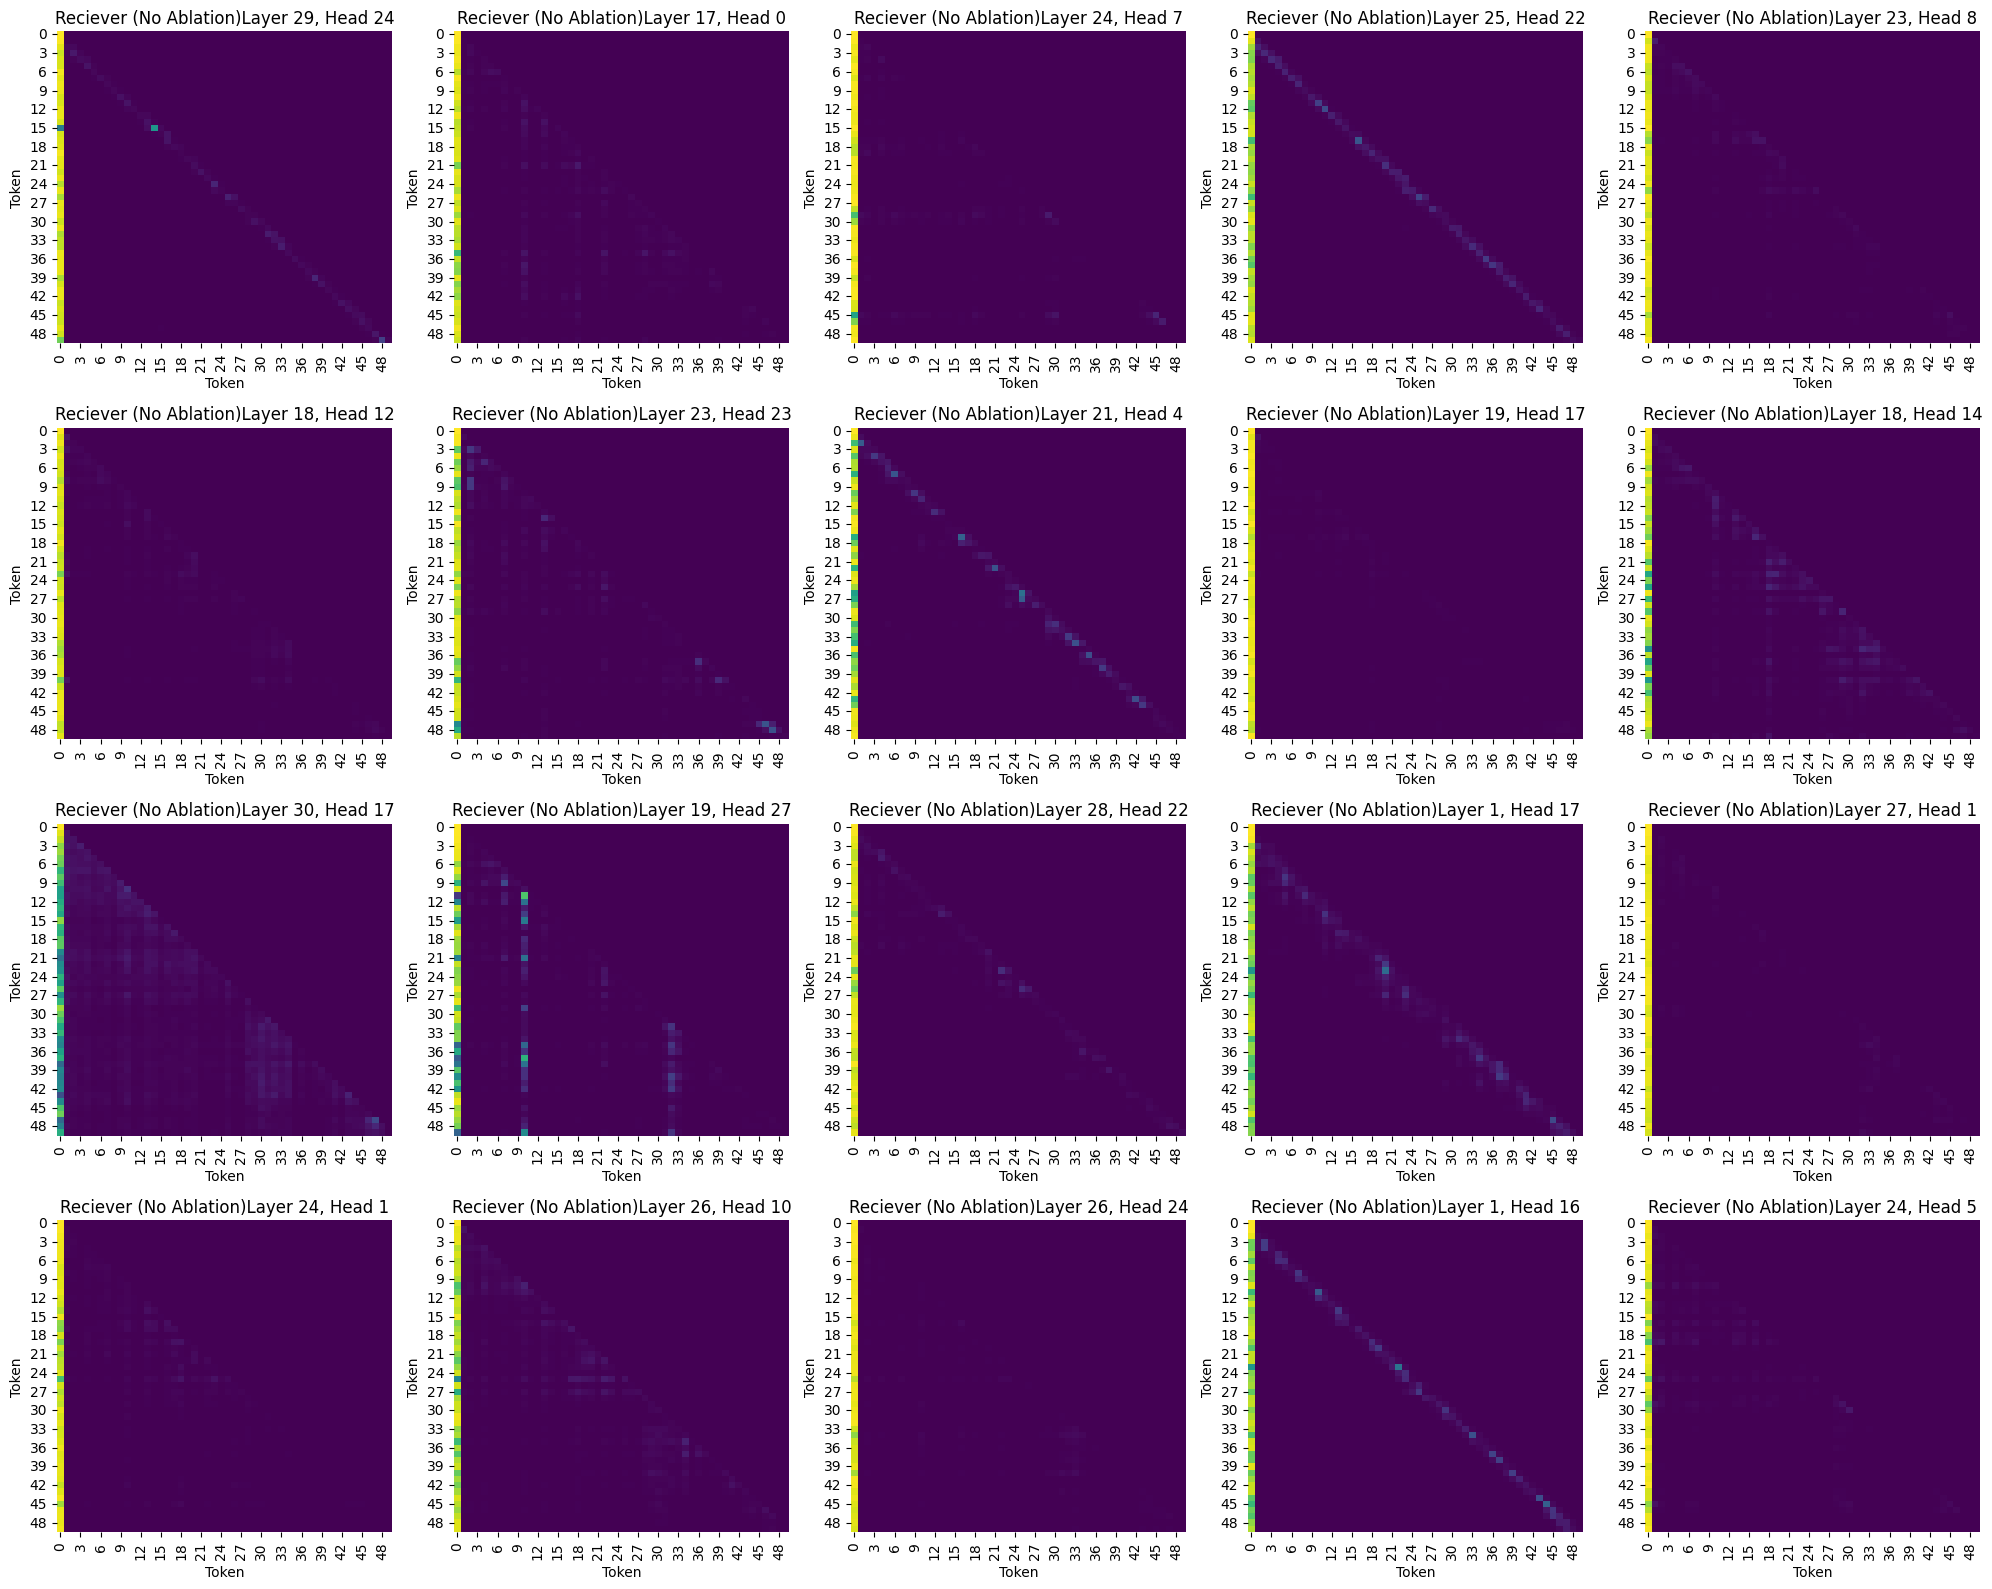

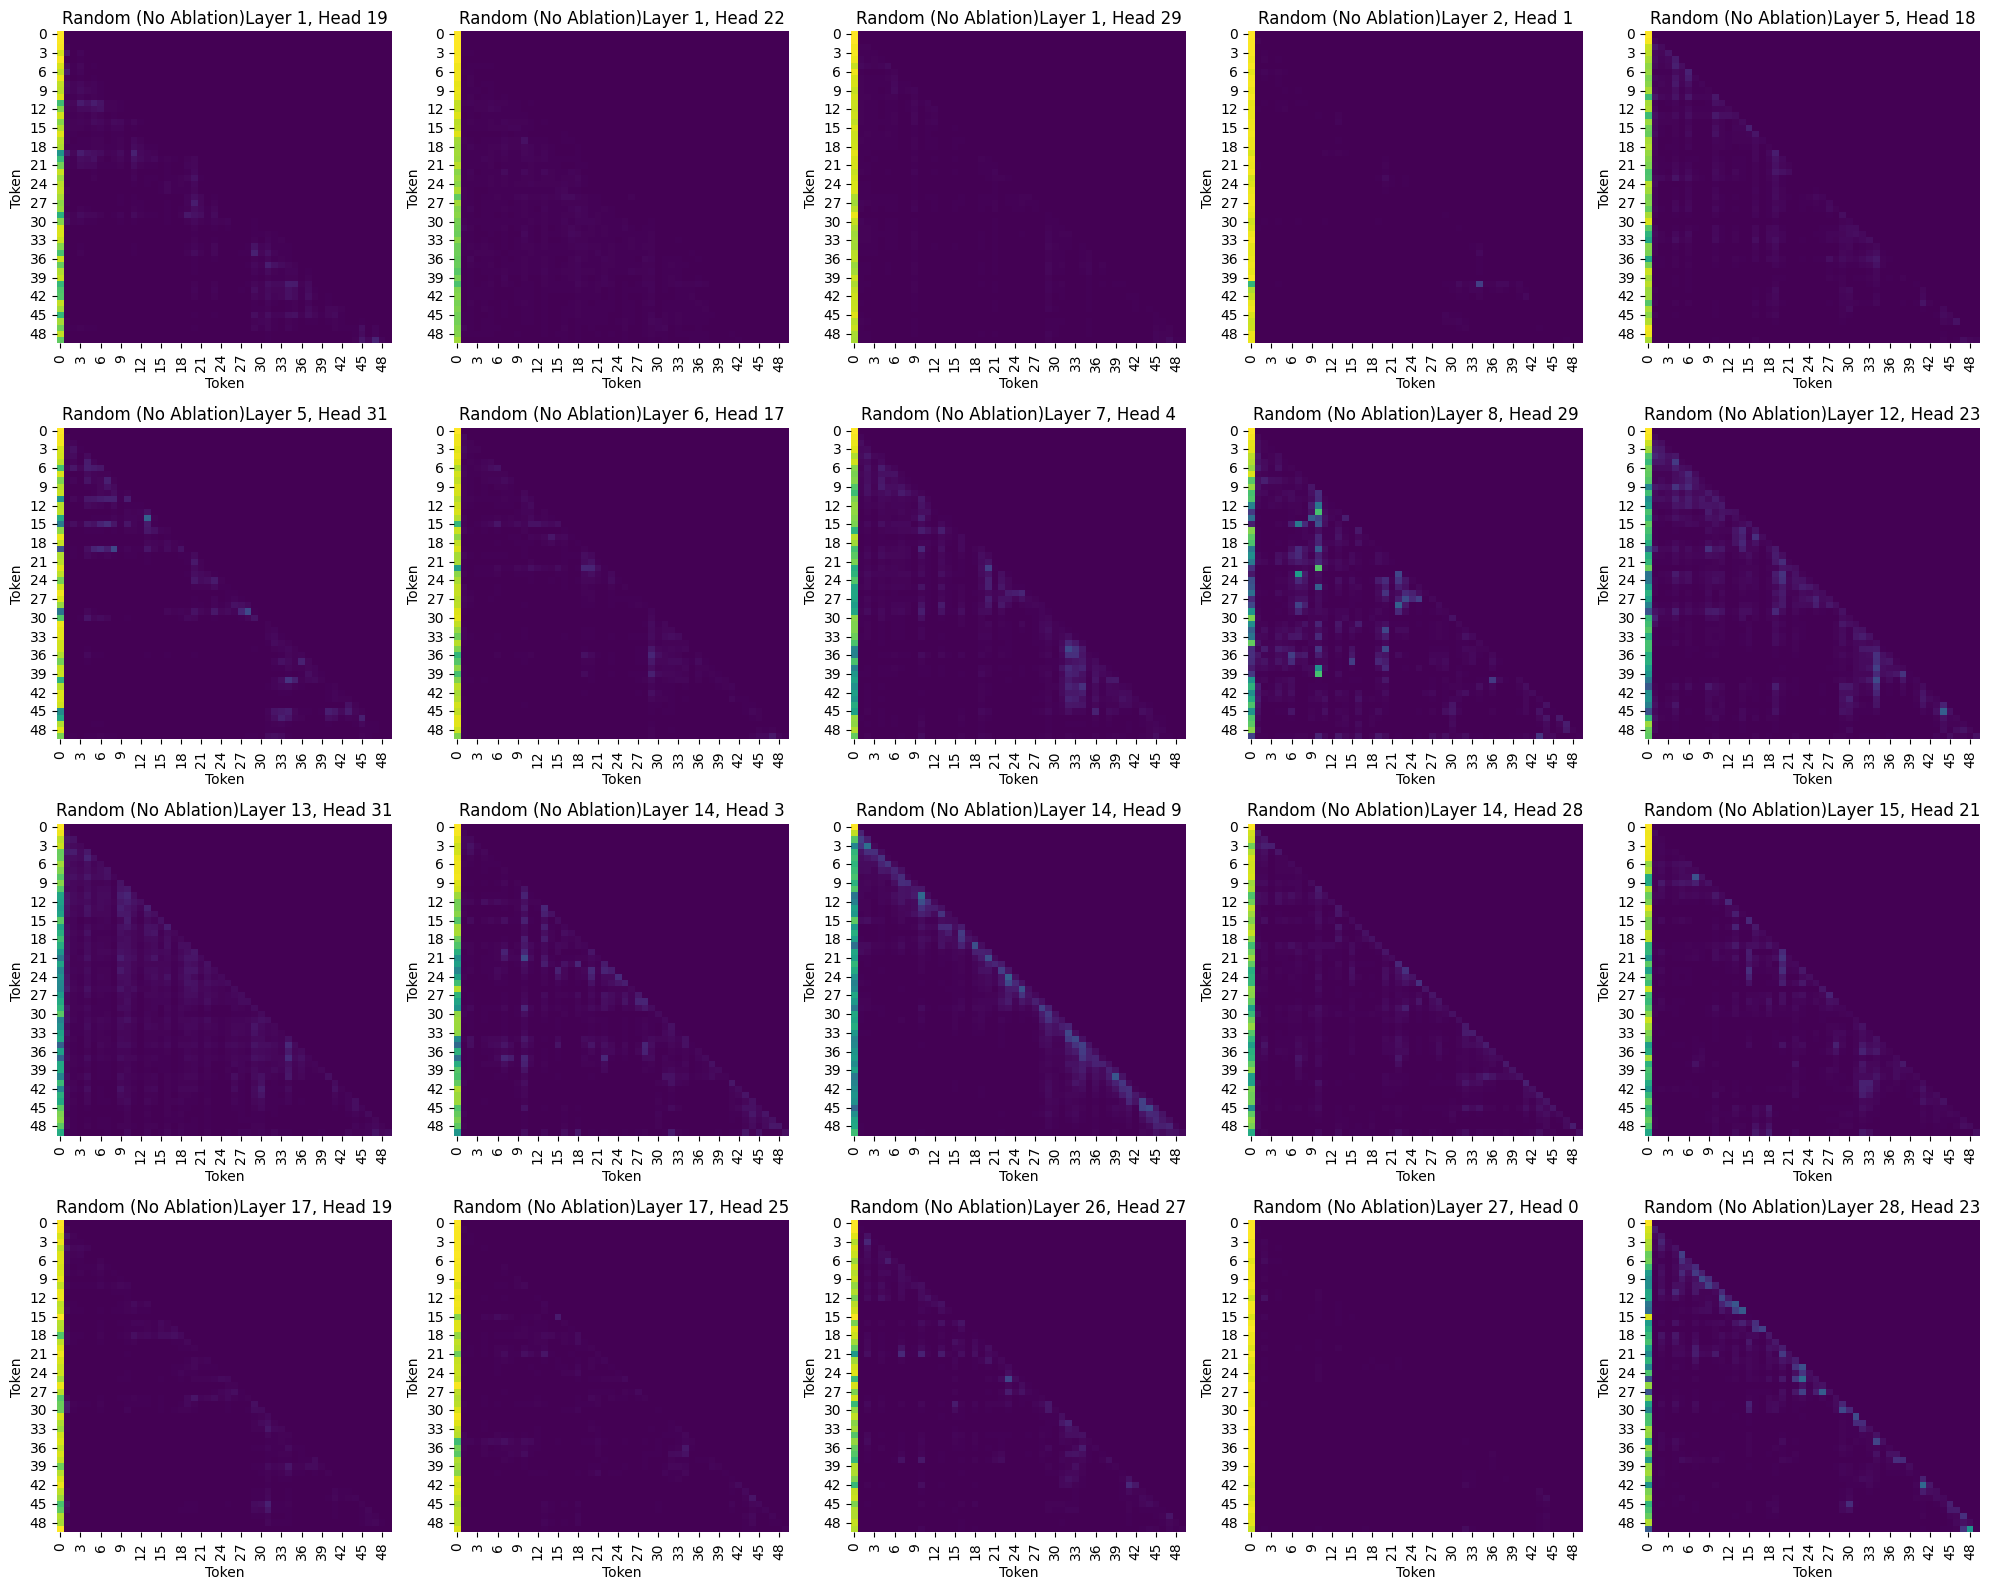

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_attention_heads(attention_tensor, head_list, title_prefix=""):
    num_heads = len(head_list)
    ncols = 5
    nrows = (num_heads + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten()
    for idx, (layer, head) in enumerate(head_list):
        attn = attention_tensor[layer, head].detach().cpu().to(torch.float32).numpy()
        # Optionally, plot only a subset of tokens for clarity:
        attn = attn[:50, :50]  # first 50 tokens
        sns.heatmap(attn, ax=axes[idx], cmap='viridis', cbar=False)
        axes[idx].set_title(f"{title_prefix}Layer {layer}, Head {head}")
        axes[idx].set_xlabel('Token')
        axes[idx].set_ylabel('Token')
    # Hide unused subplots
    for j in range(idx+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Plot reciever heads
plot_attention_heads(average_attention_all_heads_no_ablation, reciever_heads, title_prefix="Reciever (No Ablation)")

# Plot random heads
plot_attention_heads(average_attention_all_heads_no_ablation, random_heads, title_prefix="Random (No Ablation)")

In [20]:
import torch
from nnsight import LanguageModel
from transformers import LlamaForCausalLM, AutoTokenizer
import math

# --- Configuration (unchanged) ---
# Assuming Llama-7B: Hidden Size 4096 / 32 Heads = 128
HEAD_DIM = 4096 // 32
# The lists of heads (layer, head)
reciever_heads = [(29, 24), (17, 0), (24, 7), (25, 22), (23, 8), (18, 12), (23, 23), (21, 4), (19, 17), (18, 14), (30, 17), (19, 27), (28, 22), (1, 17), (27, 1), (24, 1), (26, 10), (26, 24), (1, 16), (24, 5)]
random_heads = [(1, 19), (1, 22), (1, 29), (2, 1), (5, 18), (5, 31), (6, 17), (7, 4), (8, 29), (12, 23), (13, 31), (14, 3), (14, 9), (14, 28), (15, 21), (17, 19), (17, 25), (26, 27), (27, 0), (28, 23)]
all_heads_to_check = set(reciever_heads + random_heads)
head_activations = {}

In [21]:
reciever_heads_sorted = sorted(reciever_heads, key=lambda x: x[0])
print(reciever_heads_sorted)

[(1, 17), (1, 16), (17, 0), (18, 12), (18, 14), (19, 17), (19, 27), (21, 4), (23, 8), (23, 23), (24, 7), (24, 1), (24, 5), (25, 22), (26, 10), (26, 24), (27, 1), (28, 22), (29, 24), (30, 17)]


In [34]:
hooks = []

for layer_idx, head_num in reciever_heads_sorted:
    print(f"    Adding ablation hook for head ({layer_idx}, {head_num})")
    
    # Define ablation hook for this specific head
    def create_ablation_hook(target_head_num):
        def ablation_hook(module, input, output):
            attention_output = output[0]
            batch_size_tensor, seq_len, hidden_dim = attention_output.shape
            num_heads = module.num_attention_heads
            head_dim = hidden_dim // num_heads
            
            # Zero out the specific head
            reshaped = attention_output.view(batch_size_tensor, seq_len, num_heads, head_dim)
            reshaped[:, :, target_head_num, :] = 0
            modified = reshaped.view(batch_size_tensor, seq_len, hidden_dim)
            
            return (modified,) + output[1:]
        return ablation_hook
    
    # Register hook for this layer
    attention_layer = model.model.layers[layer_idx].self_attn
    hook = attention_layer.register_forward_hook(create_ablation_hook(head_num))
    hooks.append((hook, layer_idx, head_num))

    Adding ablation hook for head (1, 17)
    Adding ablation hook for head (1, 16)
    Adding ablation hook for head (17, 0)
    Adding ablation hook for head (18, 12)
    Adding ablation hook for head (18, 14)
    Adding ablation hook for head (19, 17)
    Adding ablation hook for head (19, 27)
    Adding ablation hook for head (21, 4)
    Adding ablation hook for head (23, 8)
    Adding ablation hook for head (23, 23)
    Adding ablation hook for head (24, 7)
    Adding ablation hook for head (24, 1)
    Adding ablation hook for head (24, 5)
    Adding ablation hook for head (25, 22)
    Adding ablation hook for head (26, 10)
    Adding ablation hook for head (26, 24)
    Adding ablation hook for head (27, 1)
    Adding ablation hook for head (28, 22)
    Adding ablation hook for head (29, 24)
    Adding ablation hook for head (30, 17)


In [29]:
print(model.model.layers[0].self_attn)

LlamaAttention(
  (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
  (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
  (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
  (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
)


In [30]:
def repeat_kv(hidden_states: torch.Tensor, n_rep: int) -> torch.Tensor:
    """
    This function duplicates K/V heads 'n_rep' times to match the number of Q heads.
    
    Args:
        hidden_states (Tensor): Key or Value tensor of shape (B, H_kv, S, D)
        n_rep (int): The number of times to repeat each KV head.
        
    Returns:
        Tensor: Tensor of shape (B, H_q, S, D)
    """
    batch_size, num_key_value_heads, seq_len, head_dim = hidden_states.shape
    if n_rep == 1:
        return hidden_states
    
    # Reshape (B, H_kv, S, D) -> (B, H_kv, 1, S, D)
    hidden_states = hidden_states[:, :, None, :, :]
    
    # Repeat across the new head dimension (B, H_kv, n_rep, S, D)
    hidden_states = hidden_states.expand(batch_size, num_key_value_heads, n_rep, seq_len, head_dim)
    
    # Reshape back (B, H_kv * n_rep, S, D)
    return hidden_states.reshape(batch_size, num_key_value_heads * n_rep, seq_len, head_dim)

In [35]:
import torch.nn as nn
view_hooks = []
hidden_states_dict = {}
dropout = 0.0  # Set to your model's dropout if needed

for layer_idx, head_num in reciever_heads_sorted:
    print(f"    Adding view hook for head ({layer_idx}, {head_num})")

    # Define view hook for this specific head
    def create_view_hook(target_head_num):
        def view_hook(module, input, output):
            hidden_states = input[0] 
            query_states = module.q_proj(hidden_states)
            key_states = module.k_proj(hidden_states)

            batch_size, seq_len, hidden_dim = query_states.shape
            num_heads = 32 # the heads are 32 on model page
            head_dim = hidden_dim // num_heads


            # Compute num times to repeat key/value heads (value will not be used here)
            kv_dim = key_states.shape[-1]
            num_key_value_heads = kv_dim // head_dim # e.g., 1024 / 128 = 8
            num_key_value_groups = num_heads // num_key_value_heads # e.g., 32 / 8 = 4

            # Reshape Q/K/V to separate heads, then transpose (B, S, H, D) -> (B, H, S, D)
            query = query_states.view(batch_size, seq_len, num_heads, head_dim).transpose(1, 2)
            key = key_states.view(batch_size, seq_len, num_key_value_heads, head_dim).transpose(1, 2)

            # Repeat K/V heads to match Q heads
            key = repeat_kv(key, num_key_value_groups) 

            scaling = float(head_dim) ** -0.5

            attn_weights = torch.matmul(query, key_states.transpose(2, 3)) * scaling

            attn_weights = nn.functional.softmax(attn_weights, dim=-1, dtype=torch.float32).to(query.dtype)
            attn_weights = nn.functional.dropout(attn_weights, p=dropout, training=module.training)


            # Store the states for later analysis
            hidden_states_dict[(layer_idx, target_head_num)] = attn_weights.detach().cpu()

        return view_hook
    
    # Register hook for this layer
    attention_layer = model.model.layers[layer_idx].self_attn
    hook = attention_layer.register_forward_hook(create_view_hook(head_num))
    view_hooks.append((hook, layer_idx, head_num))

    Adding view hook for head (1, 17)
    Adding view hook for head (1, 16)
    Adding view hook for head (17, 0)
    Adding view hook for head (18, 12)
    Adding view hook for head (18, 14)
    Adding view hook for head (19, 17)
    Adding view hook for head (19, 27)
    Adding view hook for head (21, 4)
    Adding view hook for head (23, 8)
    Adding view hook for head (23, 23)
    Adding view hook for head (24, 7)
    Adding view hook for head (24, 1)
    Adding view hook for head (24, 5)
    Adding view hook for head (25, 22)
    Adding view hook for head (26, 10)
    Adding view hook for head (26, 24)
    Adding view hook for head (27, 1)
    Adding view hook for head (28, 22)
    Adding view hook for head (29, 24)
    Adding view hook for head (30, 17)


In [23]:
# Count the number of hooks registered on all modules in the model
def count_all_hooks(model):
    total_hooks = 0
    for name, module in model.named_modules():
        # Each module has _forward_hooks, _backward_hooks, _forward_pre_hooks
        for hook_dict in [module._forward_hooks, module._backward_hooks, module._forward_pre_hooks]:
            total_hooks += len(hook_dict)
    return total_hooks

print("Total hooks registered:", count_all_hooks(model))

Total hooks registered: 20


In [25]:
all_heads_to_check_sorted = sorted(all_heads_to_check, key=lambda x: x[0])
print(all_heads_to_check_sorted)

[(1, 17), (1, 29), (1, 19), (1, 22), (1, 16), (2, 1), (5, 31), (5, 18), (6, 17), (7, 4), (8, 29), (12, 23), (13, 31), (14, 28), (14, 3), (14, 9), (15, 21), (17, 0), (17, 19), (17, 25), (18, 12), (18, 14), (19, 27), (19, 17), (21, 4), (23, 8), (23, 23), (24, 5), (24, 7), (24, 1), (25, 22), (26, 24), (26, 27), (26, 10), (27, 1), (27, 0), (28, 23), (28, 22), (29, 24), (30, 17)]


In [22]:
# import nnsight
# from einops import rearrange
#  from nnsight import LanguageModel

# llm = LanguageModel(model, tokenizer=tokenizer, device_map="auto")

# #ablation worked
# HEAD_DIM = 4096 // 32 # hidden dim is 4096
# head_outputs = {}
# with llm.trace("The Eiffel Tower is in the city of"):
#     # 1. Ablate every head in reciever_heads
#     for head_tuple in all_heads_to_check_sorted:
#         layer, head = head_tuple
#         slice_start = head * HEAD_DIM
#         slice_end = (head + 1) * HEAD_DIM
#         attn = llm.model.layers[layer].self_attn.save()
#         if head_tuple in reciever_heads_sorted:
#             slice_end = (head + 1) * HEAD_DIM

#             attn_output = attn.o_proj.output
#             batch_size, seq_len, hidden_dim = attn_output.shape
#             print(f"Ablating Layer {layer}, Head {head} with output shape {attn_output.shape}")
            
#             # Use einops to reshape, ablate, and reshape back
#             reshaped = rearrange(attn_output, 'b s (h d) -> b s h d', h=32)
#             reshaped[:, :, head, :] = 0
#             attn_output[:] = rearrange(reshaped, 'b s h d -> b s (h d)')
#         q_proj = attn.q_proj.output
#         k_proj = attn.k_proj.output
#         print(q_proj.shape)
        

#         head_outputs[head_tuple] = llm.model.layers[layer].self_attn.o_proj.output[:, :, slice_start:slice_end].save()


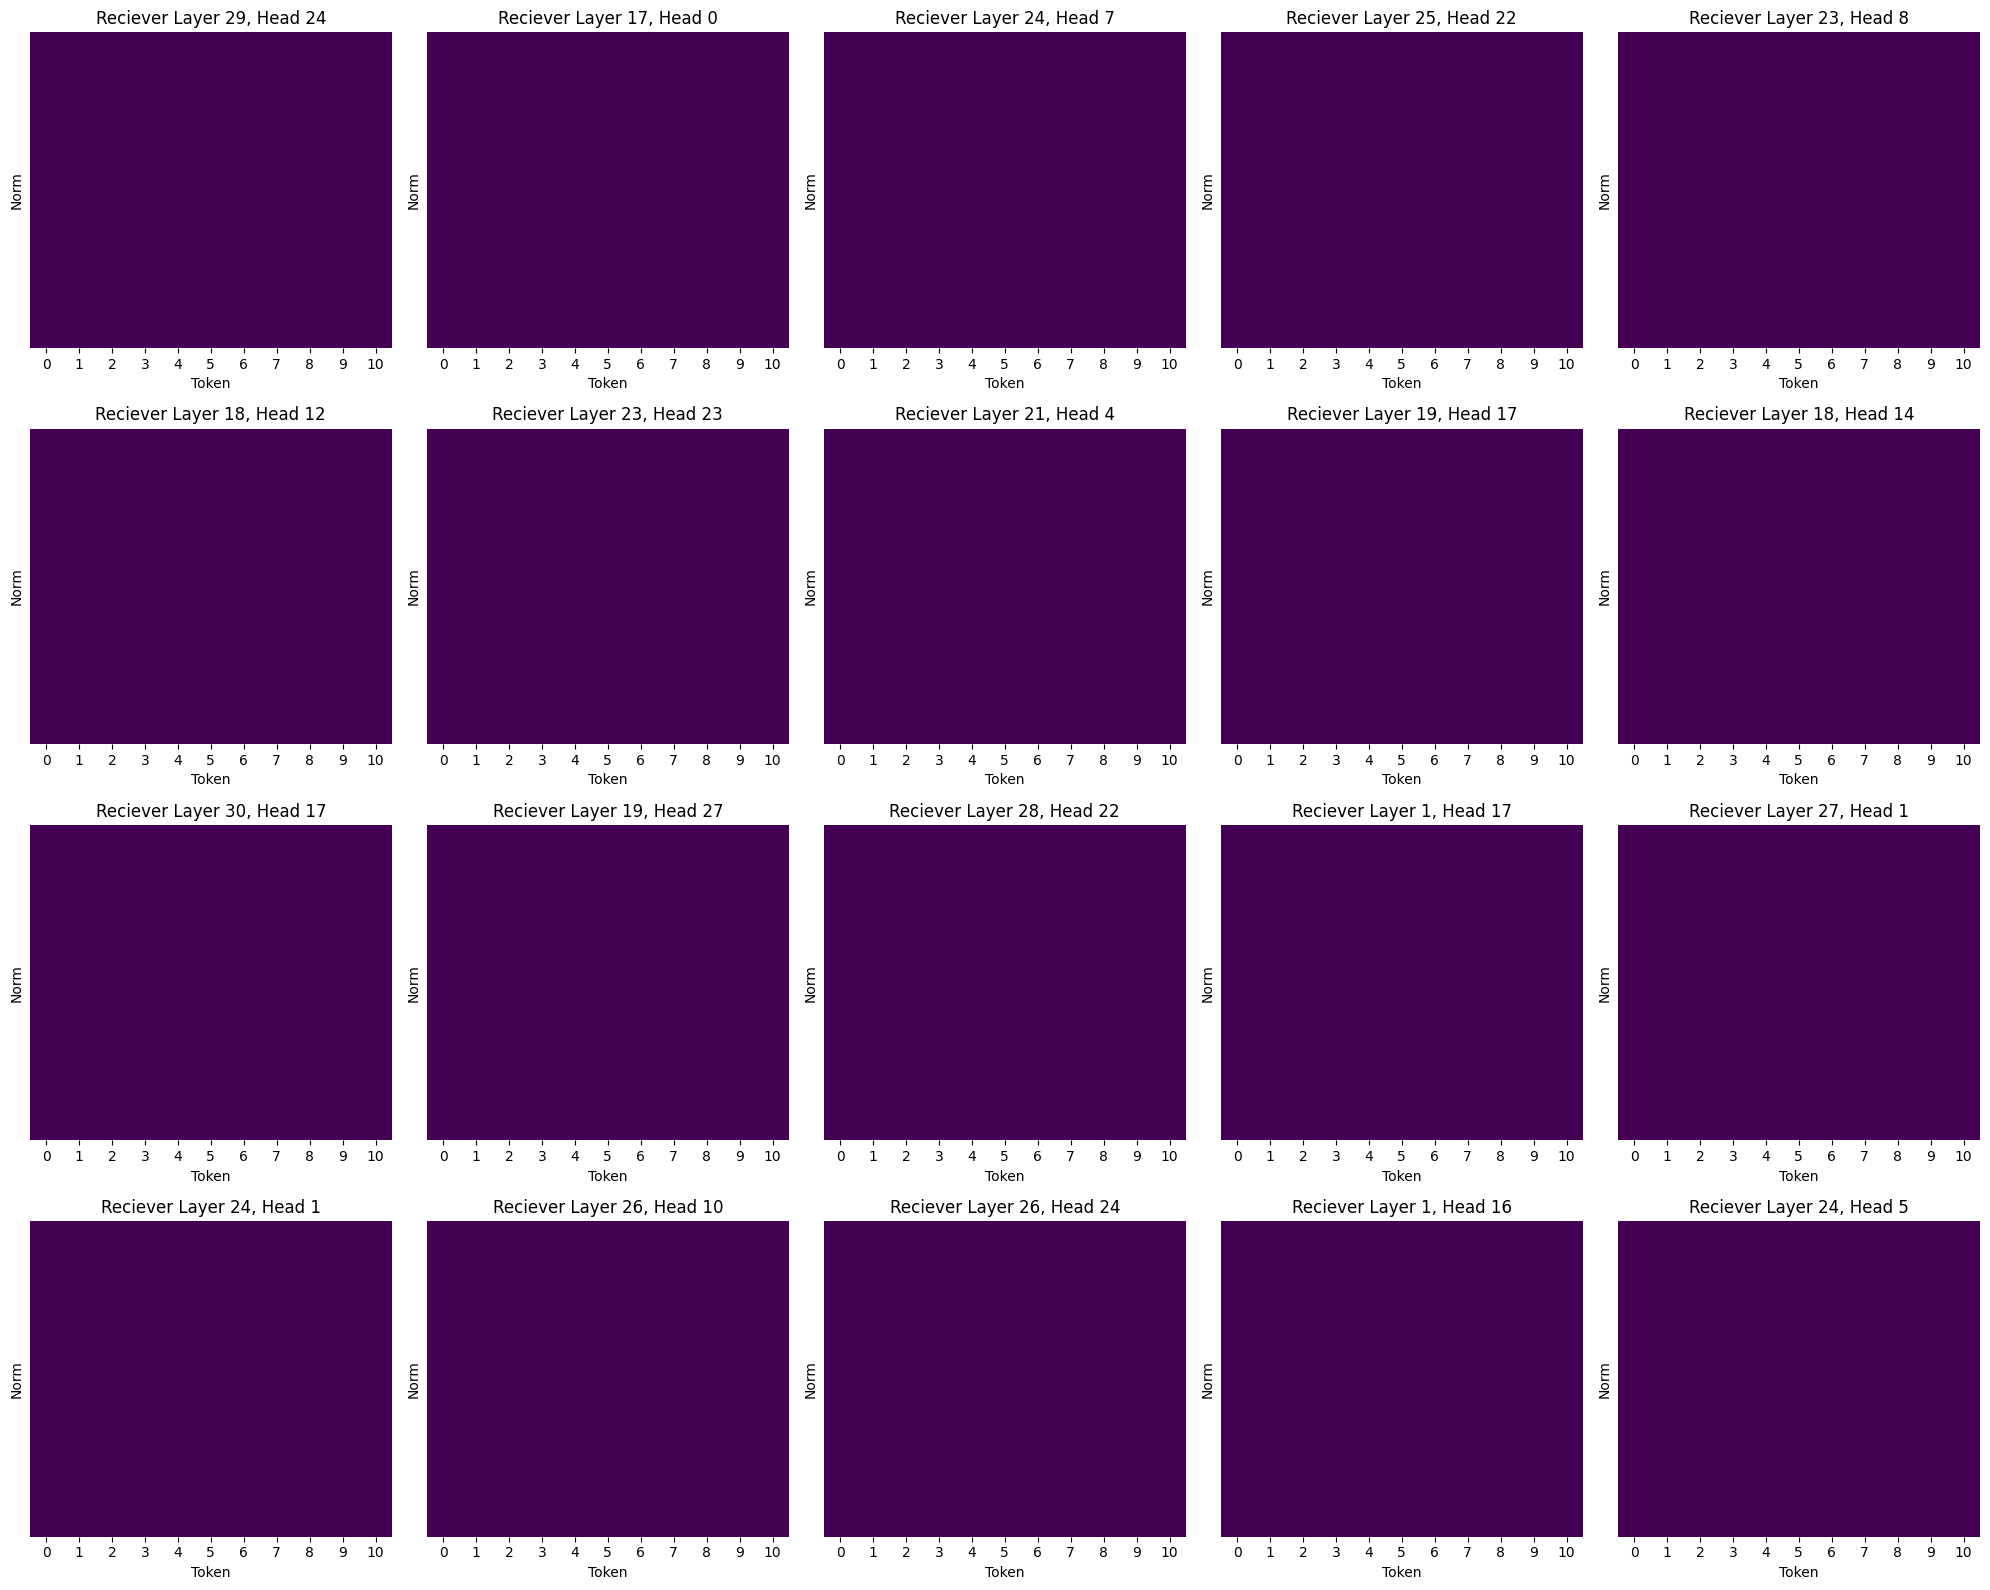

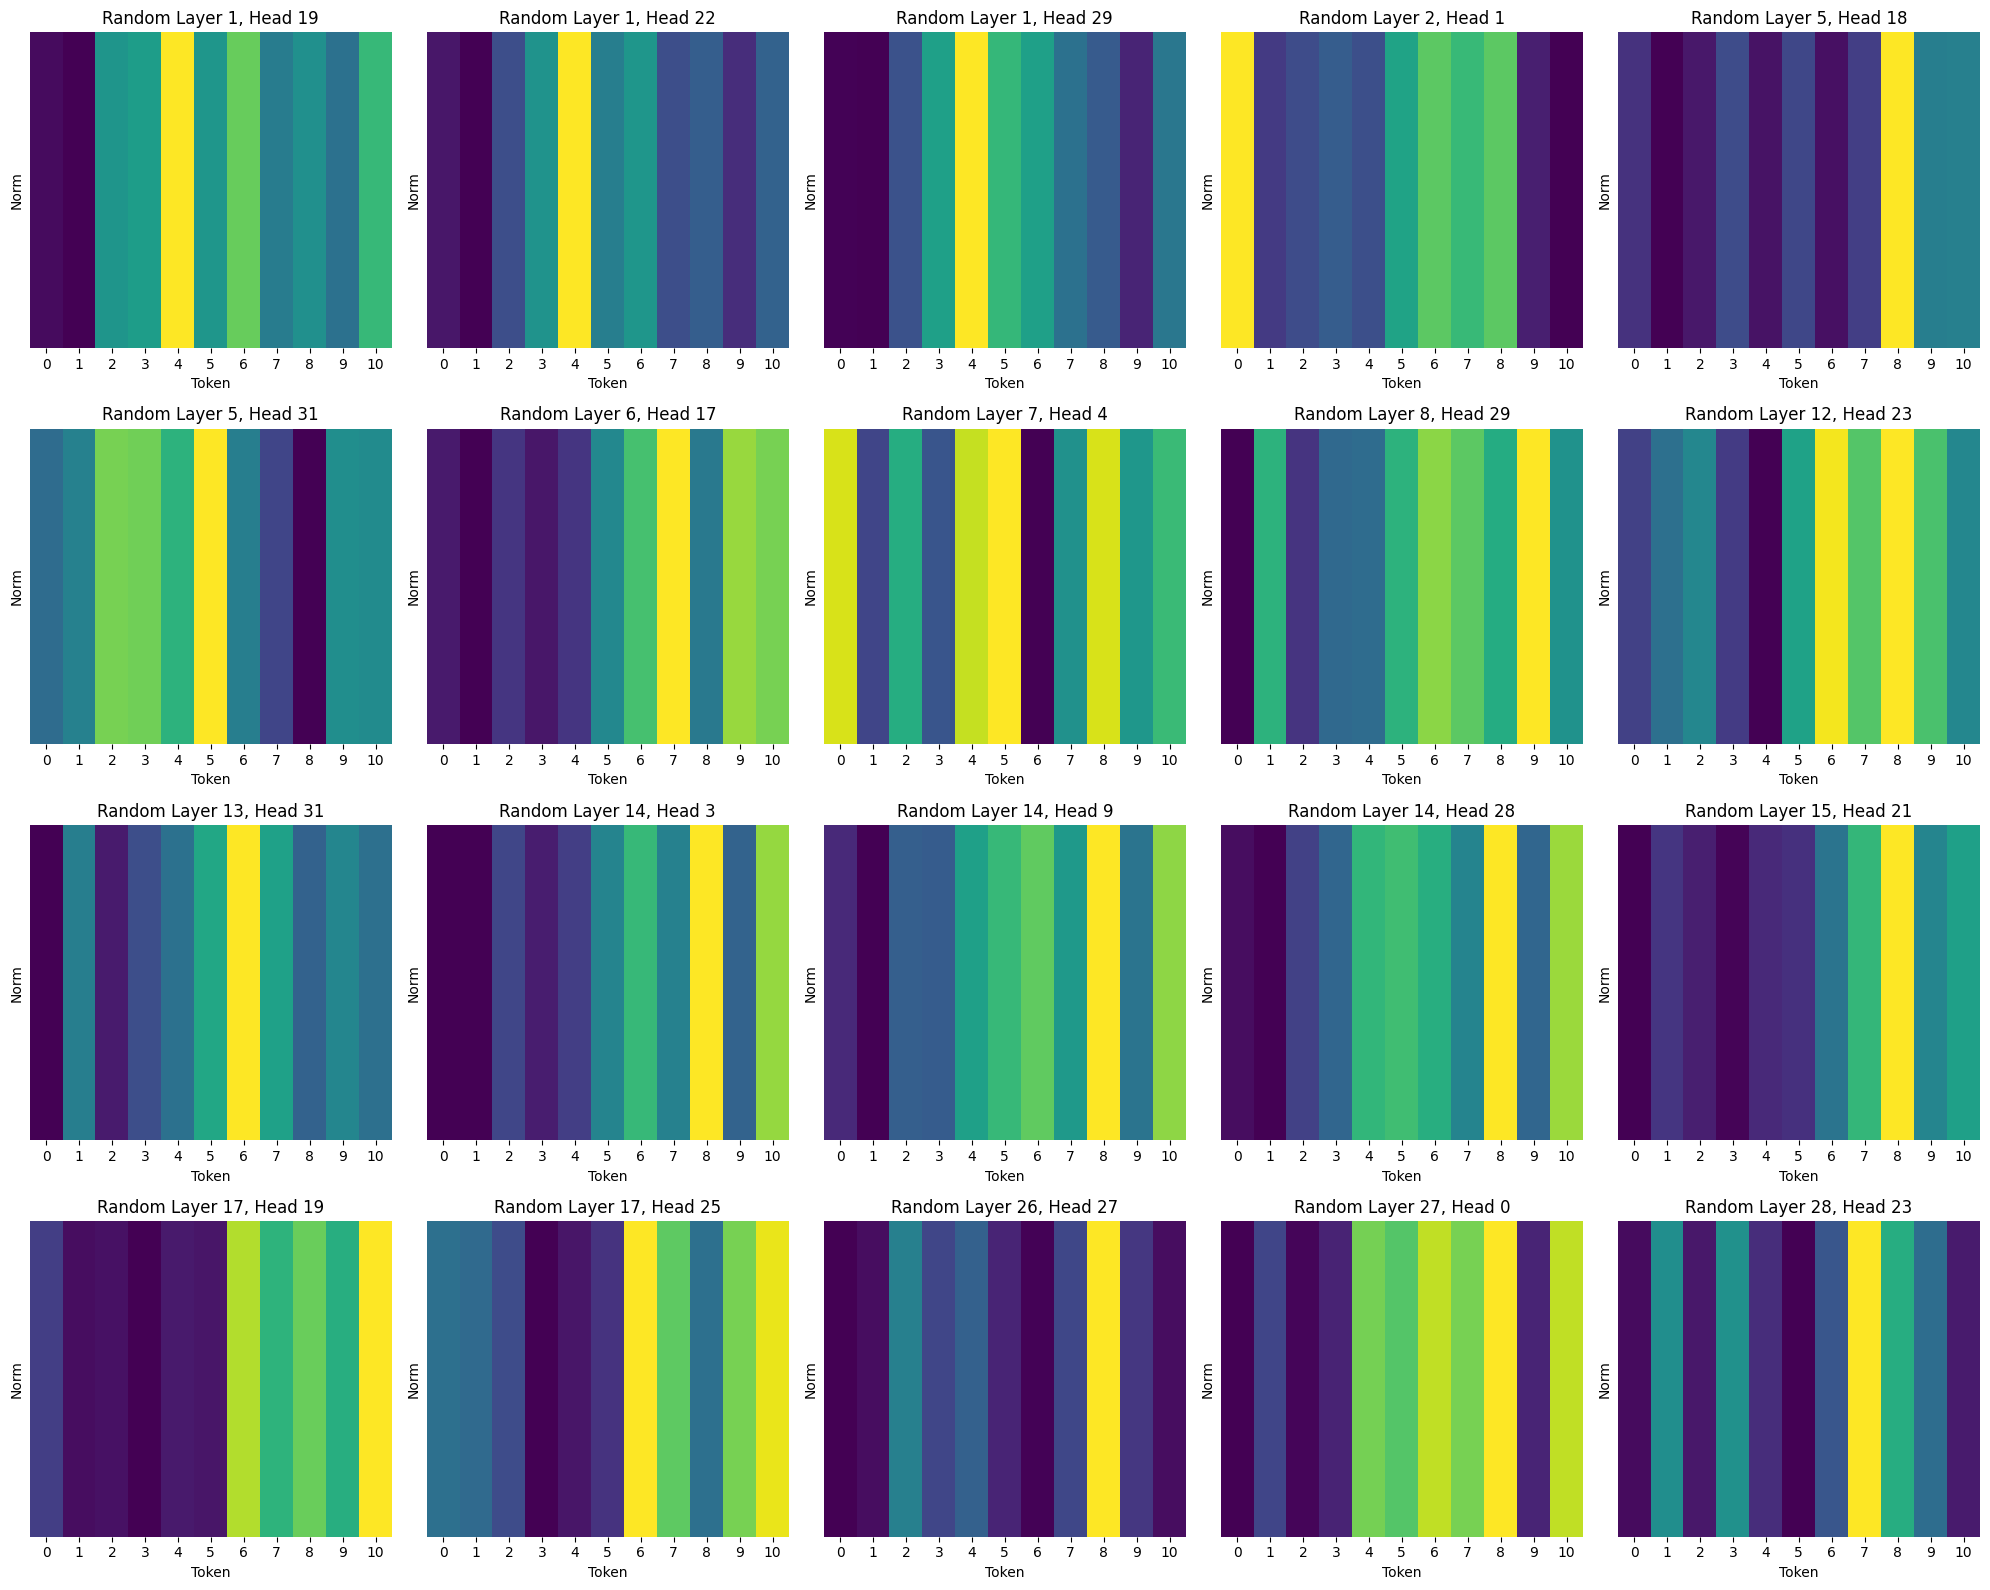

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch

def plot_head_outputs(head_outputs, head_list, title_prefix=""):
    num_heads = len(head_list)
    ncols = 5
    nrows = (num_heads + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    axes = axes.flatten()
    for idx, (layer, head) in enumerate(head_list):
        # Get the output tensor for this head
        output = head_outputs.get((layer, head))
        if output is None:
            axes[idx].set_title(f"{title_prefix}Layer {layer}, Head {head}\n(No Data)")
            axes[idx].axis('off')
            continue
        # output shape: (batch, seq, head_dim)
        # We'll plot the norm across the head_dim for each token (seq)
        # Take the first batch if batch > 1
        if isinstance(output, torch.Tensor):
            output = output.detach().cpu()
        else:
            output = torch.tensor(output)
        norm = output[0].norm(dim=-1).to(torch.float32).numpy()  # shape: (seq,)
        sns.heatmap(norm[None, :50], ax=axes[idx], cmap='viridis', cbar=False, yticklabels=False)
        axes[idx].set_title(f"{title_prefix}Layer {layer}, Head {head}")
        axes[idx].set_xlabel('Token')
        axes[idx].set_ylabel('Norm')
    # Hide unused subplots
    for j in range(idx+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Plot reciever heads
plot_head_outputs(head_outputs, reciever_heads, title_prefix="Reciever ")

# Plot random heads
plot_head_outputs(head_outputs, random_heads, title_prefix="Random ")